# 데이터 분석

In [1]:
import pandas as pd
#데이터 불러오기
mushroom = pd.read_csv('C:/Users/kim/Downloads/mushrooms.csv')
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
mushroom.describe()
#출력결과 세로8124줄, **veil-type모두 같은 값, 나중에 인코더 후 'include=all'

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [3]:
mushroom['veil-type']

0       p
1       p
2       p
3       p
4       p
       ..
8119    p
8120    p
8121    p
8122    p
8123    p
Name: veil-type, Length: 8124, dtype: object

In [4]:
mushroom.drop(['class'], axis=1)
#del mushroom['veil-type']
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
#중복 행 검사
dups=mushroom.duplicated()
print('number of duplicate rows = %d' % (dups.sum()))

number of duplicate rows = 0


In [6]:
#class열의 p,e 개수 비교
Class = mushroom['class'].value_counts()
Class

e    4208
p    3916
Name: class, dtype: int64

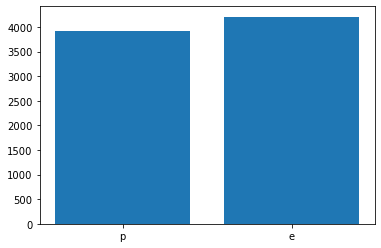

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#pltbar로 poison, edible구분하기
x=np.arange(2)
Class = ['p','e']
value = [3916,4208]

plt.bar(x, value)
plt.xticks(x, Class)
plt.show()
#edible이 poisonable보다 조금 더 많은 값을 가지는 것을 알 수 있음

# 데이터 전처리

In [8]:
from sklearn.preprocessing import LabelEncoder
#카테고리 유형으로 변환
mushroom = mushroom.astype('category')

#라벨 인코더를 사용하여 숫자로
label_encoder=LabelEncoder()
for column in mushroom.columns:
    mushroom[column] = label_encoder.fit_transform(mushroom[column])
    
#데이터셋 확인
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


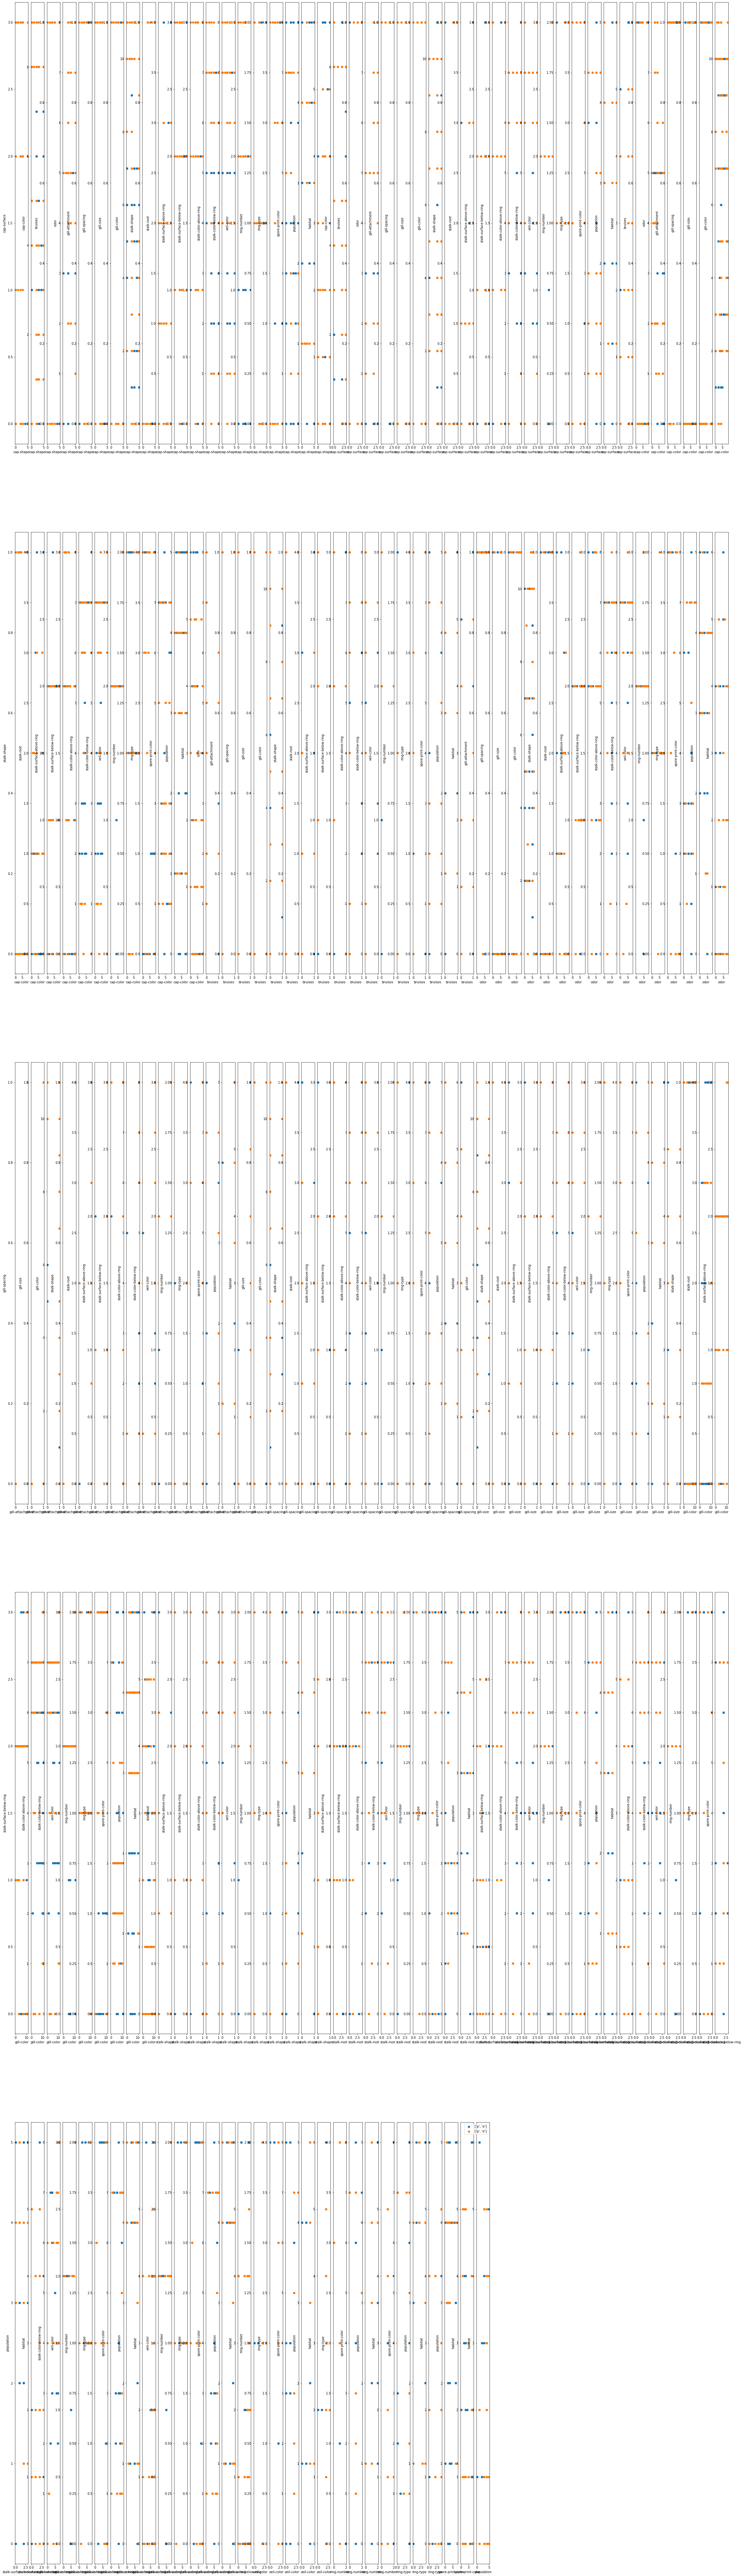

In [9]:
import itertools
%matplotlib inline

features = ['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
combinations = itertools.combinations(features, 2)
fig = plt.figure(figsize=(40,300))

figure_index = 1

Groups = mushroom.groupby('class')

for combination in combinations:
    axs = fig.add_subplot(10,45, figure_index)
    for name, group in Groups:
        axs.scatter(group[combination[0]], group[combination[1]], label=Class)
    # set the axis labels of the current sub plot
    axs.set_xlabel(combination[0])
    axs.set_ylabel(combination[1])
    # increase the figure index (otherwise all plots are drawn in the first subplot)
    figure_index +=1

plt.legend()
plt.show()

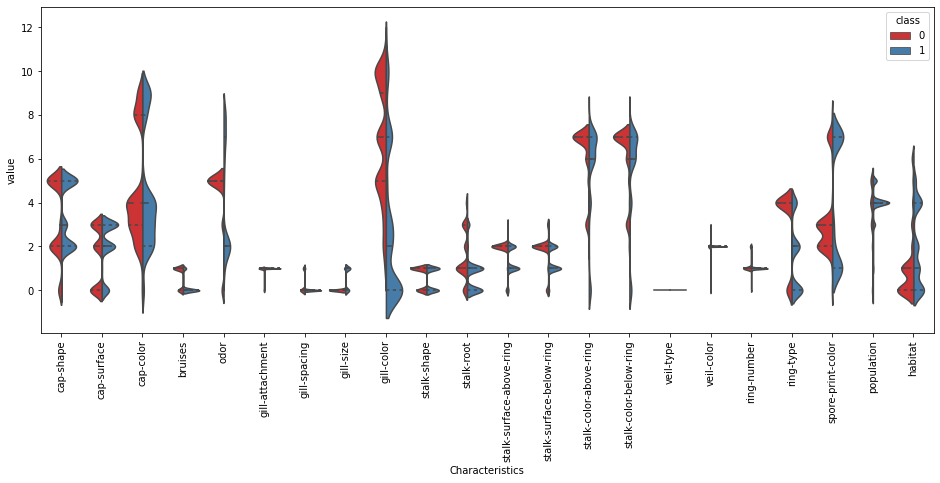

In [18]:
#gill-color로 속성 분류에 기여
import seaborn as sns

mushroom_div = pd.melt(mushroom, 'class' , var_name='Characteristics')
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x='Characteristics', y='value', hue='class', split = True, data=mushroom_div, inner = 'quartile', palette = 'Set1')
#character = pd.mushroom(data.DataFrame)
#class제거 데이터 만들기
mushroom_no_class = mushroom.drop(['class'], axis = 1)
p.set_xticklabels(rotation = 90, labels = list(mushroom_no_class.columns));

#gill-color값들이 3.5정도의 값을 기준으로 나뉜다는 것을 확인 가능

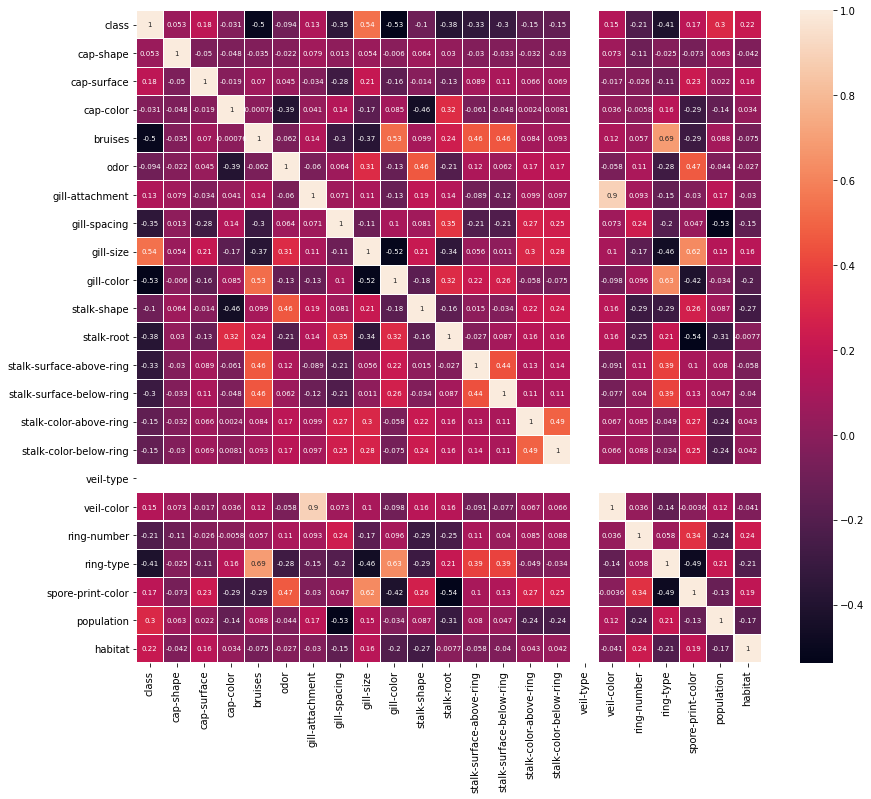

In [19]:
#heatmap을 통한 상관계수 분석(인용)
plt.figure(figsize=(14,12))
sns.heatmap(mushroom.corr(),linewidths=.1, annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#gill-color의상관계수가 -0.53으로 최소 상관변수에 가까운 것을 확인 가능

In [20]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#train, test 데이터셋 만들기
X = mushroom.drop(['class'], axis=1)
y = mushroom['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=0.2)

## 분류 알고리즘
- DecisionTreeClassifier
- Knn classifier

In [21]:
#DecisionTreeClassifier 그리기
from sklearn.tree import DecisionTreeClassifier
%pip install -q -U graphviz
import graphviz
from sklearn import tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=X.columns, 
                                class_names=label_encoder.classes_,
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph


Note: you may need to restart the kernel to use updated packages.


TypeError: can only concatenate str (not "numpy.int64") to str

In [ ]:
from sklearn.metrics import accuracy_score
y_prediction = dt.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test, y_prediction)))
#DecisionTreeModel로 모든 버섯을 분류할 수 있다..?

In [ ]:
#DecisionTreeModel의 ConfusionMatrix
from sklearn.metrics import confusion_matrix
from matplotlib import cm

plt.xlabel("Predicted Lable")
plt.ylabel("True label")
plt.title('Confusion Matrix')
x_labels = ["edible", "poisonous"]
y_labels = ["edible", "poisonous"]

sns.heatmap(cm, annot = True, fmt = ".0f", cmap=plt.cm.Blues, xticklabels=x_labels, yticklabels=y_labels)

cnf_matrix = confusion_matrix(y_test, y_prediction)

plt.show()

print("Accuracy: {}".format(accuracy_score(y_test, y_prediction)))



### 실행 되었을 때의 confusion_matrix의 사진입니다.
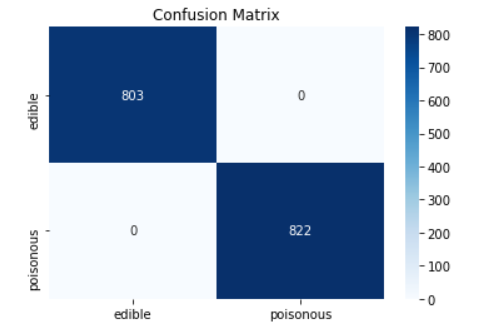

In [290]:
#KNN을 이용한 분석
from sklearn.neighbors import KNeighborsClassifier


for K in range(1,21):
    knn = KNeighborsClassifier(K)
    knn.fit(X_train, y_train)
    X_prediction_knn = knn.predict(X_test)
    print("K = %d, Accuracy: {}".format(accuracy_score(y_test, X_prediction_knn))%K)

#KNN알고리즘은 0.99이상의 1에 근사한 정확도 값들을 가진다.

K = 1, Accuracy: 1.0
K = 2, Accuracy: 0.9993846153846154
K = 3, Accuracy: 1.0
K = 4, Accuracy: 0.9956923076923077
K = 5, Accuracy: 0.9956923076923077
K = 6, Accuracy: 0.9956923076923077
K = 7, Accuracy: 0.9956923076923077
K = 8, Accuracy: 0.9944615384615385
K = 9, Accuracy: 0.9944615384615385
K = 10, Accuracy: 0.9950769230769231
K = 11, Accuracy: 0.9944615384615385
K = 12, Accuracy: 0.9932307692307693
K = 13, Accuracy: 0.9932307692307693
K = 14, Accuracy: 0.992
K = 15, Accuracy: 0.9926153846153846
K = 16, Accuracy: 0.9913846153846154
K = 17, Accuracy: 0.9913846153846154
K = 18, Accuracy: 0.9913846153846154
K = 19, Accuracy: 0.9913846153846154
K = 20, Accuracy: 0.9901538461538462


### 앙상벌 알고리즘
- Random Forest

In [291]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=50)
rf.fit(X_train, y_train)

print("Accuracy: {}".format(rf.score(X_test, y_test)))

#Random Forest 또한 1.0(100%)의 정확도를 가지는 것을 확인할 수 있다.

Accuracy: 1.0
